In [8]:
"hello"

'hello'

In [11]:
"this better work"

'this better work'

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

performance = pd.read_csv("StudentPerformanceFactors.csv")
performance.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [10]:
# make a new dataframe with encoded NUMERIC variables
encoded = performance

encoded["n_parental_involvement"] = [0 if x == 'Low' else 1 if x == 'Medium' else 2 for x in encoded["Parental_Involvement"]] # list comprehension
encoded["n_access_to_resources"] = [0 if x == 'Low' else 1 if x == 'Medium' else 2 for x in encoded["Access_to_Resources"]]
encoded["n_extracurriculars"] = [0 if x == 'No' else 1 for x in encoded["Extracurricular_Activities"]]
encoded["n_motivation"] = [0 if x == 'Low' else 1 if x == 'Medium' else 2 for x in encoded["Motivation_Level"]]
encoded["n_internet"] = [0 if x == 'No' else 1 for x in encoded["Internet_Access"]]
encoded["n_family_income"] = [0 if x == 'Low' else 1 if x == 'Medium' else 2 for x in encoded["Family_Income"]]
encoded["n_teacher_quality"] = [0 if x == 'Low' else 1 if x == 'Medium' else 2 for x in encoded["Teacher_Quality"]]
encoded["n_schooltype"] = [0 if x == 'Public' else 1 for x in encoded["School_Type"]]
encoded["n_peer_influence"] = [0 if x == 'Negative' else 1 if x == 'Neutral' else 2 for x in encoded["Peer_Influence"]]
encoded["n_learning_disabilities"] = [0 if x == 'No' else 1 for x in encoded["Learning_Disabilities"]]
encoded["n_parentaleducation"] = [0 if x == 'High School' else 1 if x == 'College' else 2 for x in encoded["Parental_Education_Level"]]
encoded["n_distance_from_home"] = [0 if x == 'Near' else 1 if x == 'Moderate' else 2 for x in encoded["Distance_from_Home"]]
encoded["n_gender"] = [0 if x == 'Male' else 1 for x in encoded["Gender"]]

# move exam scores column to the end
encoded["ExamScore"] = encoded["Exam_Score"]

encoded = encoded.drop(columns=["Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities", "Motivation_Level", "Internet_Access",
                     "Family_Income", "Teacher_Quality", "School_Type", "Peer_Influence", "Learning_Disabilities", "Parental_Education_Level",
                     "Distance_from_Home", "Gender", "Exam_Score"])

encoded.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,n_parental_involvement,n_access_to_resources,n_extracurriculars,n_motivation,n_internet,n_family_income,n_teacher_quality,n_schooltype,n_peer_influence,n_learning_disabilities,n_parentaleducation,n_distance_from_home,n_gender,ExamScore
0,23,84,7,73,0,3,0,2,0,0,1,0,1,0,2,0,0,0,0,67
1,19,64,8,59,2,4,0,1,0,0,1,1,1,0,0,0,1,1,1,61
2,24,98,7,91,2,4,1,1,1,1,1,1,1,0,1,0,2,0,0,74
3,29,89,8,98,1,4,0,1,1,1,1,1,1,0,0,0,0,1,0,71
4,19,92,6,65,3,4,1,1,1,1,1,1,2,0,1,0,1,0,1,70


(array([  68., 1384., 2906., 2019.,  175.,   16.,   11.,    7.,   11.,
          10.]),
 array([ 55. ,  59.6,  64.2,  68.8,  73.4,  78. ,  82.6,  87.2,  91.8,
         96.4, 101. ]),
 <BarContainer object of 10 artists>)

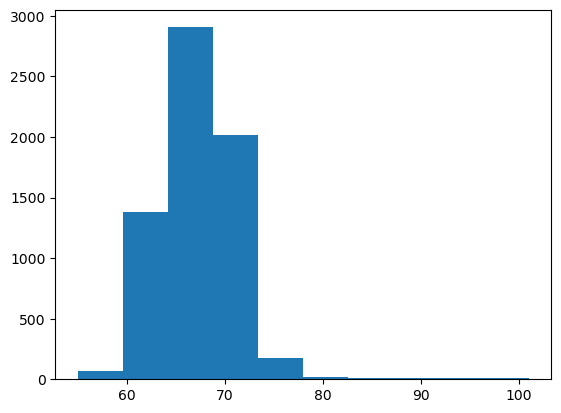

In [4]:
plt.hist(encoded["ExamScore"]) # y is approximately normally distributed (good for regression purposes)

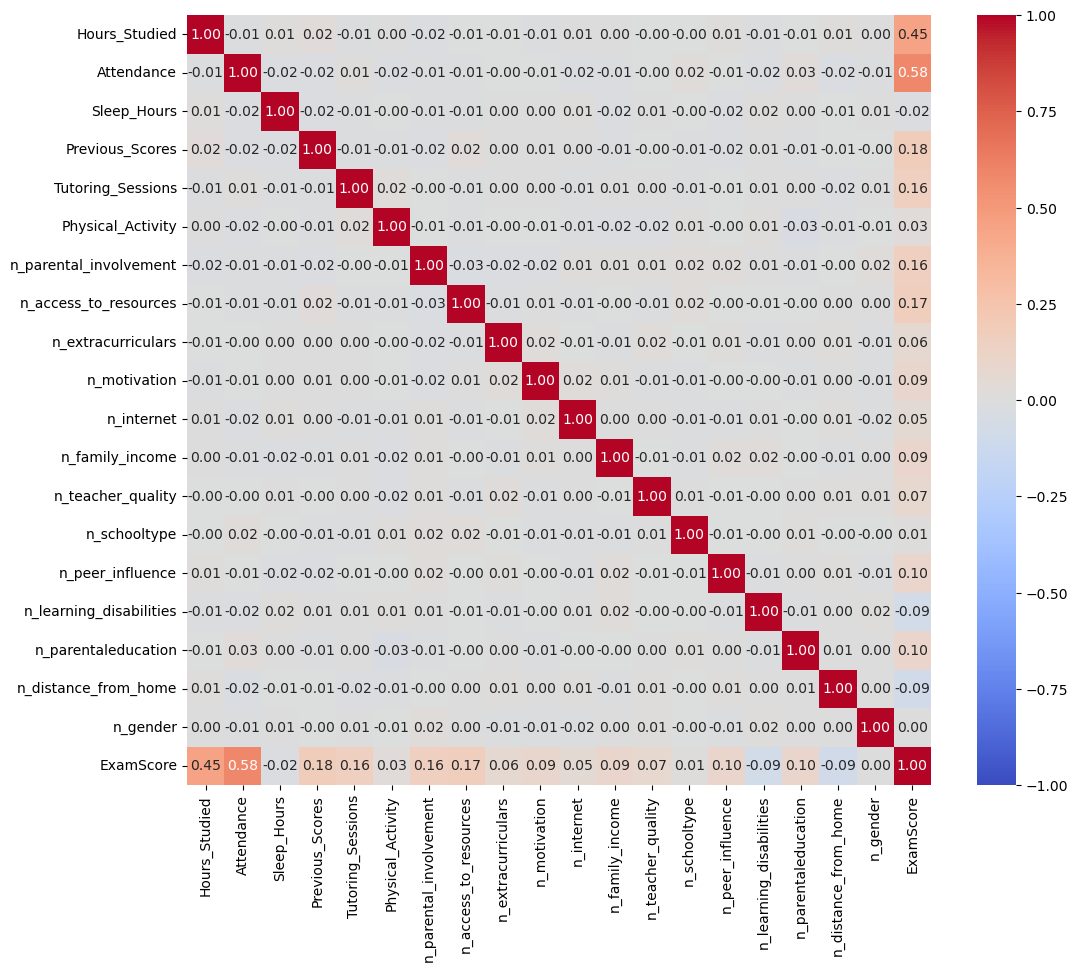

In [5]:
corr_matrix = encoded.corr()

# correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

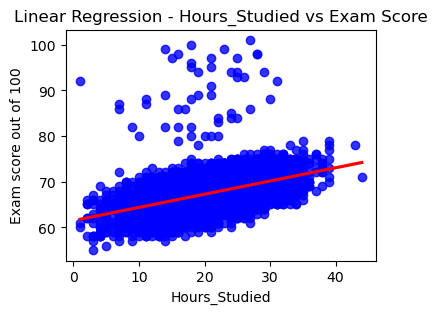

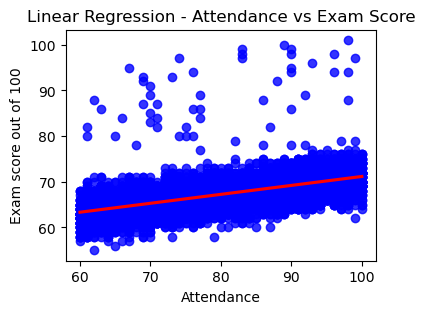

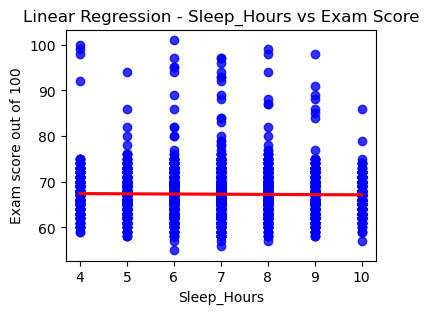

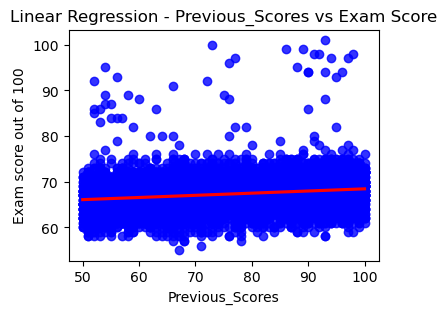

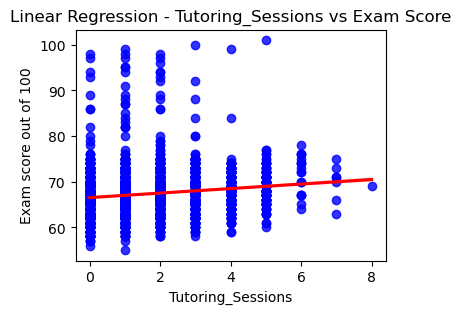

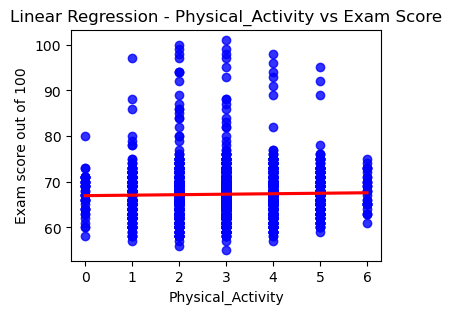

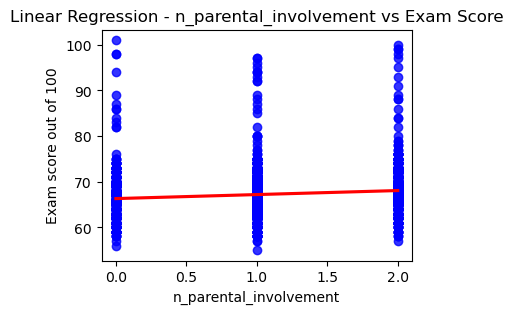

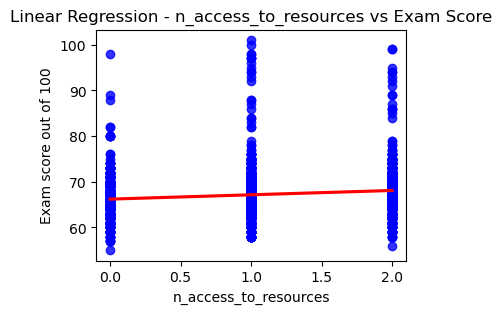

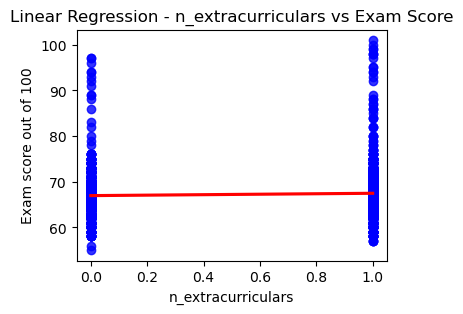

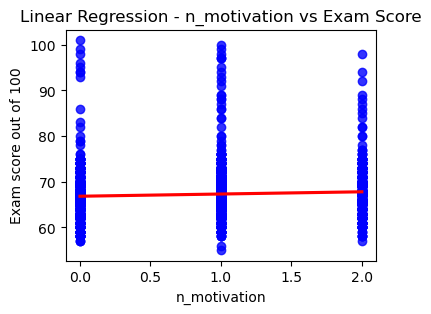

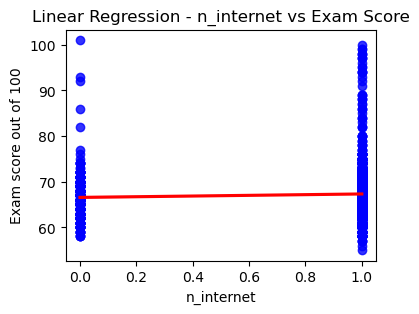

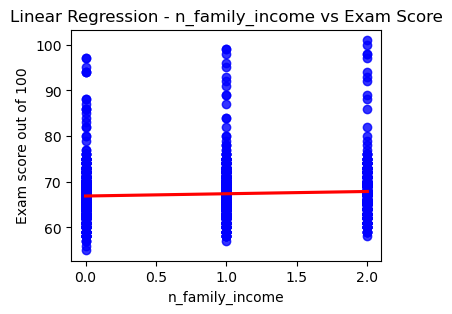

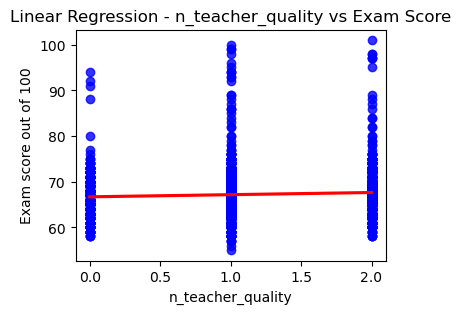

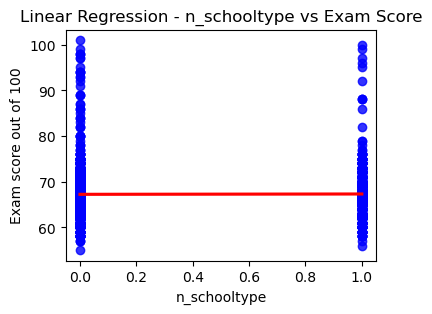

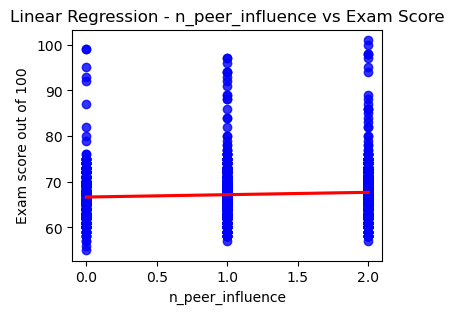

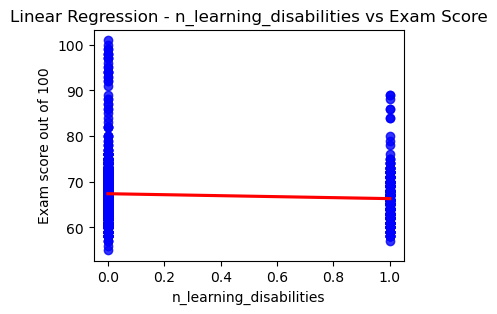

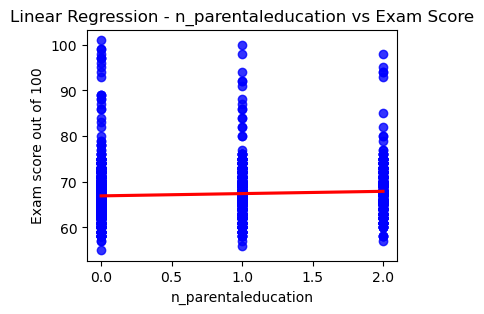

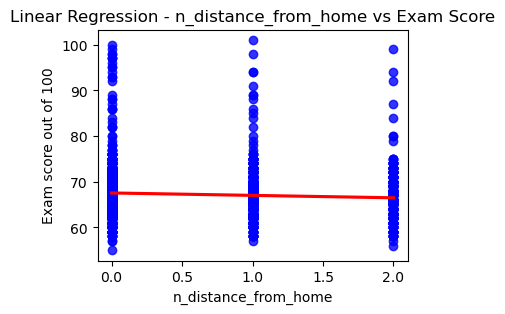

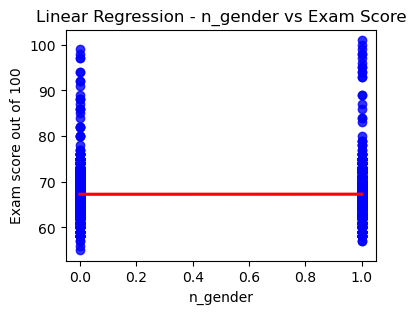

[0.289290628609581, 0.19576871978431706, -0.04510658737355753, 0.047301919924266515, 0.4948553141454169, 0.10497136807818429, 0.8788311309533342, 0.9457808791795702, 0.5104136597592396, 0.486098509507693, 0.757824424225006, 0.4953593257071168, 0.4709192954560511, 0.07478666574576995, 0.5158094098307966, -1.0786168358952906, 0.49748725981468517, -0.5291287061759595, 0.016004409105015355]


In [6]:
coefficients_array = []
model = LinearRegression()

for i in range(len(encoded.columns) - 1):
    # MAKE A LINEAR REGRESSION FIT FOR EACH COLUMN:
    column_name = encoded.columns[i]
    X = encoded[[column_name]] # x must be a dataframe for regression
    y = encoded["ExamScore"] # y can be an array
    
    model.fit(X, y)

    coef = model.coef_[0] # Coefficient (slope) for the linear regression
    coefficients_array.append(coef)

    
    # visual plot for each X
    plt.figure(figsize = (4, 3))
    sns.regplot(data=encoded, x=X, y=y, scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'}, fit_reg=True)

    plt.title(f'Linear Regression - {column_name} vs Exam Score')
    plt.xlabel(f'{column_name}')
    plt.ylabel("Exam score out of 100")

    plt.show()

print(coefficients_array)

0.289290628609581 61.456983609504064


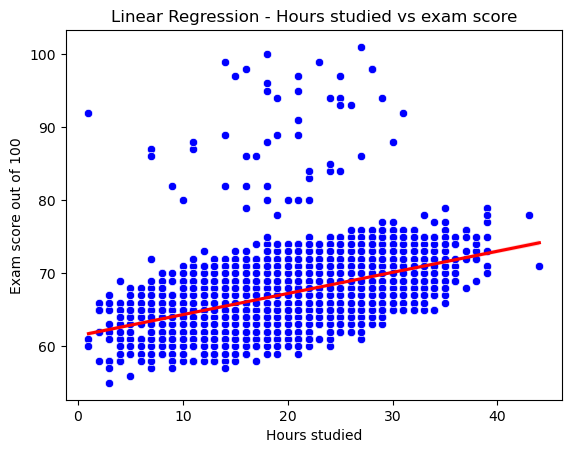

In [7]:
model = LinearRegression() # run linear regression

model.fit(performance[["Hours_Studied"]], # x must be a dataframe
                performance["Exam_Score"]) # y can be an array

slope = model.coef_[0]  # Coefficient (slope) for the linear regression
intercept = model.intercept_  # Intercept
print(slope, intercept)

# visual plot
sns.scatterplot(performance, x=performance["Hours_Studied"], y=performance["Exam_Score"], color='blue')
sns.regplot(performance,x=performance["Hours_Studied"], y=performance["Exam_Score"], scatter=False, color='red') # make a regression on the same plot, w/o scattered points

plt.title("Linear Regression - Hours studied vs exam score")
plt.xlabel("Hours studied")
plt.ylabel("Exam score out of 100")

plt.show()